<a href="https://colab.research.google.com/github/CV-JaeHa/recommender-system-learn/blob/main/recommender_system_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 추천 시스템 (Recommender System)

- 추천 시스템은 크게 두가지로 구분 가능
    1. 컨텐츠 기반 필터링 (content-based filtering)
    2. 협업 필터링 (collaborative filtering)
- 두가지를 조합한 hybrid 방식 또한 가능
- 컨텐츠 기반 필터링은 지금까지 사용자의 이전행동과 명시적 피드백을 통해 사용자가 좋아하는 것과 유사한 항목을 추천
- 협업 필터링은 사용자와 항복간의 유사성을 동시에 추천

## Surprise
- 추천 시스템 개발을 위한 라이브러리
- 다양한 모델과 데이터 제공
- scikit-learn과 유사한 사용 방법

In [1]:
!pip install scikit-surprise

# Import Library

In [2]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

In [3]:
# 영화 데이터
data = Dataset.load_builtin('ml-100k', prompt=False)
# 10개만 보기
data.raw_ratings[:10]

# 데이터구조 [유저, 영화, 점수, 아이디]

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013')]

In [4]:
model = SVD()

mse : 평균 제곱 오차  
통계적 추정의 정확성에 대한 질적인 척도 수치가 작을수록 정확성이 높은 것  
수학적인 분석이 쉽고 계산이 용이하다.  
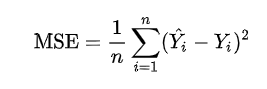

회귀분석으로 예측값이 나오고 그것을 실제 값과 뺴주어 나온 값을 모두 더해 평균을 내준다.

Root mean square error  
rmse : 평균 제곱근 오차(MSE의 제곱근 / 루트를 씌운 것이다.)  

---  

mean absolute error
mae : 평균절대오차  
모든 절대 오차의 평균이다.  
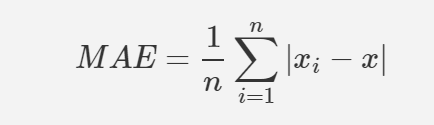

1. 각 측정값과 실제값 사이의 절대 오차를 구하기
2. 구한 절대 오차들을 모두 더하기
3. 이를 절대 오차의 평균(개수값)을 구하기  

---  

mse는 회귀에서 자주 사용하는 손실 함수이다.  
정확도 개념은 회귀에 적용되지 않는다.  
일반적인 회귀 지표는 mae다.  
</br>
mse는 손실 함수로 쓰이고, mae는 회귀지표로써 사용된다.

---

Explanation
[https://steadiness-193.tistory.com/277](https://steadiness-193.tistory.com/277)

In [15]:
# 검증
## measure : 검증방법 / CV : 폴더 / verbose : 학습의 진행 상황을 보여줄 것인지
cross_validate(model, data, measures=['rmse', 'mae'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9359  0.9360  0.9368  0.9365  0.9377  0.9366  0.0007  
MAE (testset)     0.7375  0.7361  0.7370  0.7399  0.7403  0.7381  0.0016  
Fit time          4.99    4.87    4.90    4.91    4.86    4.91    0.04    
Test time         0.20    0.28    0.18    0.30    0.18    0.23    0.05    


{'fit_time': (4.98571252822876,
  4.871892690658569,
  4.899631023406982,
  4.912055969238281,
  4.860328674316406),
 'test_mae': array([0.73746234, 0.73609329, 0.7369706 , 0.73985603, 0.74027622]),
 'test_rmse': array([0.93590421, 0.93595016, 0.93684934, 0.93648057, 0.93772283]),
 'test_time': (0.20037007331848145,
  0.2781541347503662,
  0.18168139457702637,
  0.30420494079589844,
  0.1751868724822998)}

# 컨텐츠 기반 필터링 (Content-based Filtering)

- 컨텐츠 기반 필터링은 이전의 행동과 명시적 피드백을 통해 좋아하는 것과 유사한 항목을 추천
  - ex) 내가 지금까지 시청한 영화 목록과 다른 사용자의 시청 목록을 비교해 나와 비슷한 취향의 사용자가 시청한 영화를 추천
- 유사도를 기반으로 추천
- 컨텐츠 기반 필터링은 다음과 같은 장단점이 있다.
  - 장점
    - 많은 수의 사용자를 대상으로 쉽게 확장 가능
    - 사용자가 관심을 갖지 않던 상품 추천 가능
  - 단점
    - 입력 특성을 직접 설계해야하기 때문에 많은 도메인 지식이 필요
    - 사용자의 기존 관심사항을 기반으로만 추천 가능

In [16]:
 import numpy as np
 from surprise import Dataset

## 이진 벡터의 내적을 통해 다른 사용자들과 유사도 구하기
- 나와 가장 높은 유사도를 가진 사용자의 시청 목록을 추천

In [18]:
data = Dataset.load_builtin('ml-100k', prompt=False)
raw_data = np.array(data.raw_ratings, dtype=int)

In [19]:
# 0부터 시작할 수 있도록 조절
raw_data[:, 0] -= 1
raw_data[:, 1] -= 1

In [20]:
# 인접 행렬 구하기 (총 인원 수 구하기)
n_users = np.max(raw_data[:, 0]) # 총 유저 수
n_movies = np.max(raw_data[:, 1]) # 총 영화 수
shape = (n_users + 1, n_movies + 1) # 행렬

shape

(943, 1682)

In [22]:
adj_matrix = np.ndarray(shape, dtype=int)
for user_id, movie_id, rating, time in raw_data:
  adj_matrix[user_id][movie_id] = 1.

# 1이 있는게 데이터의 위치
adj_matrix

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [35]:
my_id, my_vector = 0, adj_matrix[0]
best_match, best_match_id, best_match_vector = -1, -1, []

for user_id, user_vector in enumerate(adj_matrix):
  # 만약에 나와 유저 아이디가 다르면 시뮬레이트 비교 (유사성 비교)
  if my_id != user_id:
    similarity = np.dot(my_vector, user_vector)
    # 유사성이 best_math보다 크면 best_match를 시뮬레이터로 바꿔준다.
    if similarity > best_match:
      best_match = similarity
      best_match_id = user_id
      best_match_vector = user_vector

print(f"Best Match : {best_match}, Best Match ID : {best_match_id}")

Best Match : 183, Best Match ID : 275


In [36]:
recommend_list = []
for i, log in enumerate(zip(my_vector, best_match_vector)):
  log1, log2 = log
  if log1 < 1. and log2 > 0.:
    recommend_list.append(i)

# Recommend list
print(recommend_list)

[272, 273, 275, 280, 281, 283, 287, 288, 289, 290, 292, 293, 297, 299, 300, 301, 302, 306, 312, 314, 315, 316, 317, 321, 322, 323, 324, 327, 330, 331, 332, 333, 339, 342, 345, 346, 353, 354, 355, 356, 357, 363, 364, 365, 366, 372, 374, 378, 379, 381, 382, 383, 384, 385, 386, 387, 390, 391, 392, 394, 395, 396, 398, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 412, 414, 416, 417, 418, 419, 420, 422, 424, 425, 426, 427, 428, 430, 431, 432, 435, 442, 446, 447, 448, 449, 450, 451, 452, 454, 455, 457, 460, 461, 462, 468, 469, 470, 471, 472, 473, 474, 478, 495, 500, 507, 517, 522, 525, 530, 539, 540, 543, 545, 546, 548, 549, 550, 551, 553, 557, 558, 560, 561, 562, 563, 565, 566, 567, 568, 570, 571, 574, 575, 576, 577, 580, 581, 582, 585, 587, 589, 590, 594, 596, 602, 623, 626, 627, 630, 633, 635, 639, 646, 648, 651, 652, 654, 657, 664, 668, 671, 677, 678, 681, 683, 684, 685, 690, 691, 692, 695, 696, 708, 709, 714, 718, 719, 720, 724, 726, 727, 731, 733, 734, 736, 738, 741, 742, 745,

## 유클리드 거리를 사용해 추천  
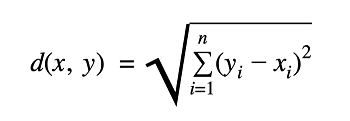  
- 거리가 가까울수록(값이 작을 수록) 나와 유사한 사용자

In [29]:
my_id, my_vector = 0, adj_matrix[0]
best_match, best_match_id, best_match_vector = -1, -1, []

for user_id, user_vector in enumerate(adj_matrix):
  if my_id != user_id:
    enclidean_dist = np.sqrt(np.sum(np.square(my_vector - user_vector)))
    if enclidean_dist > best_match:
      best_match = enclidean_dist
      best_match_id = user_id
      best_match_vector = user_vector

print(f"Best Match : {best_match}, Best Match ID : {best_match_id}")

Best Match : 26.40075756488817, Best Match ID : 404


In [31]:
recommend_list = []
for i, log in enumerate(zip(my_vector, best_match_vector)):
  log1, log2 = log
  if log1 < 1. and log2 > 0.:
    recommend_list.append(i)

print(recommend_list)

[287, 301, 302, 307, 312, 316, 317, 340, 346, 349, 350, 355, 356, 360, 363, 364, 365, 366, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 390, 391, 392, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 479, 481, 500, 503, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 535, 536, 539, 540, 541, 542, 544, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 587, 591, 592, 602, 605, 620, 621, 622, 623, 624, 625, 626, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654,

## 코사인 유사도를 사용해 추천
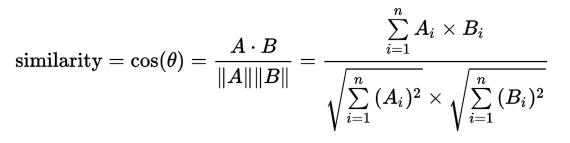  
- 두 벡터가 이루고 있는 각을 계산  
</br>
norm : 벡터의 크기(magnitude) 또는 길이(length)를 측정하는 방법
</br>
x = [2, 3]</br>
||x|| = |2| + |3| = 5
</br>

Reference : [https://bskyvision.com/825](https://bskyvision.com/825)

In [32]:
def compute_cos_similarity(v1, v2):
  norm1 = np.sqrt(np.sum(np.square(v1)))
  norm2 = np.sqrt(np.sum(np.square(v2)))
  dot = np.dot(v1, v2)

  return dot / (norm1 * norm2)

In [37]:
my_id, my_vector = 0, adj_matrix[0]
best_match, best_match_id, best_match_vector = -1, -1, []

for user_id, user_vector in enumerate(adj_matrix):
  if my_id != user_id:
    cos_similarity = compute_cos_similarity(my_vector, user_vector)
    if enclidean_dist > best_match:
      best_match = cos_similarity
      best_match_id = user_id
      best_match_vector = user_vector

print(f"Best Match : {best_match}, Best Match ID : {best_match_id}")

Best Match : 0.3882746165681559, Best Match ID : 942


In [38]:
recommend_list = []
for i, log in enumerate(zip(my_vector, best_match_vector)):
  log1, log2 = log
  if log1 < 1. and log2 > 0.:
    recommend_list.append(i)

print(recommend_list)

[273, 280, 281, 283, 317, 355, 366, 372, 384, 385, 390, 392, 398, 400, 401, 402, 404, 405, 411, 414, 418, 420, 422, 425, 426, 430, 442, 448, 449, 467, 469, 470, 474, 484, 507, 525, 540, 545, 548, 558, 565, 567, 568, 569, 575, 580, 584, 594, 608, 613, 624, 654, 671, 684, 716, 719, 720, 721, 723, 731, 738, 755, 762, 764, 784, 793, 795, 807, 815, 823, 824, 830, 839, 927, 940, 942, 1010, 1027, 1043, 1046, 1066, 1073, 1187, 1227, 1329]


### 기존 방법에 명시적 피드백(사용자가 평가한 영화 점수)를 추가해 실험

In [39]:
adj_matrix = np.ndarray(shape, dtype=int)
for user_id, movie_id, rating, time in raw_data:
  adj_matrix[user_id][movie_id] = rating

# 기존의 정보는 봤냐 안봤냐만을 알려주지만 지금은 평가를 했는지 안했는지를 알려준다.
adj_matrix

array([[5, 3, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]])

In [40]:
my_id, my_vector = 0, adj_matrix[0]
best_match, best_match_id, best_match_vector = -1, -1, []

for user_id, user_vector in enumerate(adj_matrix):
  if my_id != user_id:
    cos_similarity = compute_cos_similarity(my_vector, user_vector)
    if cos_similarity > best_match:
      best_match = cos_similarity
      best_match_id = user_id
      best_match_vector = user_vector

print(f"Best Match : {best_match}, Best Match ID : {best_match_id}")

## 26분 6초

Best Match : 0.569065731527988, Best Match ID : 915
